In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import scipy.stats as stats
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
df = pd.read_csv(r'C:\Users\aacjp\KC_Final.csv')

In [2]:
df.head()

,price,sqft_lot,waterfront,lat,has_basement,sqft_living,zip_density
0,221900.0,0.374187,0.0,0.5112,0,0.567220,0.661690
1,538000.0,0.479621,0.0,0.7210,1,1.235386,0.587569
2,180000.0,0.662278,0.0,0.7379,0,0.370135,0.955798
3,604000.0,0.331139,0.0,0.5208,1,0.942162,0.011237
4,510000.0,0.535120,0.0,0.6168,0,0.807567,2.937626


# Checking for Multicollinearity
we still have a little bit with area and lattitude, it is best to keep all values under 5, but it is worth the increased accuracy.

In [54]:
X = df.drop(['price', 'lat'], axis='columns')

pd.Series([variance_inflation_factor(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns)

sqft_lot        1.170035
waterfront      1.003535
has_basement    1.628774
sqft_living     3.085329
zip_density     2.295262
dtype: float64

# Building a Linear Regression Model with Statsmodels

Doing a train test split first.

In [66]:
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
train_df = pd.concat([X_train, y_train], axis='columns')

In [67]:
f = 'price~sqft_lot+waterfront+has_basement+sqft_living+zip_density-1'

In [68]:
predictor = ols(formula=f, data=train_df).fit()

In [69]:
predictor.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.897
Model:                            OLS   Adj. R-squared (uncentered):              0.897
Method:                 Least Squares   F-statistic:                          2.678e+04
Date:                Fri, 09 Oct 2020   Prob (F-statistic):                        0.00
Time:                        17:17:44   Log-Likelihood:                     -2.0714e+05
No. Observations:               15398   AIC:                                  4.143e+05
Df Residuals:                   15393   BIC:                                  4.143e+05
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
sqft_lot        54.7582    492.238      0.111      0.911    -910.087    1019.603
waterfront    2.258e+05   2.54e+04      8.881      0.000    1.76e+05    2.76e+05
has_basement   3.73e+04   2832.877     13.168      0.000    3.18e+04    4.29e+04
sqft_living   4.309e+05   2307.878    186.726      0.000    4.26e+05    4.35e+05
zip_density   4.074e+04   1628.068     25.026      0.000    3.76e+04    4.39e+04
==============================================================================
Omnibus:                      493.803   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              587.122
Skew:                           0.398   Prob(JB):                    3.22e-128
Kurtosis:                       3.530   Cond. No.                         56.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

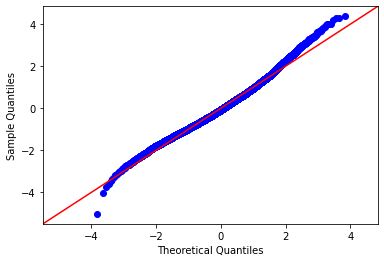

In [70]:
fig = sm.graphics.qqplot(predictor.resid, dist=stats.norm, line='45', fit=True)

In [73]:
x_cols = list(X_train.columns)

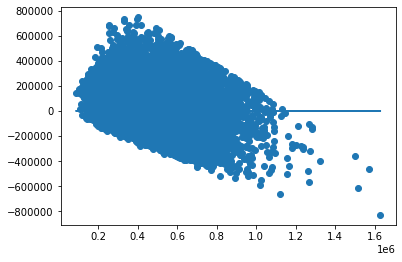

In [75]:
plt.scatter(predictor.predict(X_train[x_cols]), predictor.resid)
plt.plot(predictor.predict(X_train[x_cols]), [0 for i in range(len(X_train))]);

# Putting results in a table

In [76]:
results = pd.DataFrame(list(predictor.predict(X_test)))
results.columns = ['Predicted Price']
results['Actual Price'] = list(y_test)

In [77]:
te = []
pe = []
for i in range(len(results)):
    if results['Actual Price'][i] > results['Predicted Price'][i]:
        te.append(round(results['Actual Price'][i] - results['Predicted Price'][i], 2))
        pe.append(round(((results['Actual Price'][i] / results['Predicted Price'][i])-1)*100, 2))
    else:
        te.append(round(results['Predicted Price'][i] - results['Actual Price'][i], 2))
        pe.append(round(((results['Predicted Price'][i] / results['Actual Price'][i])-1)*100, 2))

In [78]:
results['$ Error'] = te
results['% Error'] = pe
results

,Predicted Price,Actual Price,$ Error,% Error
0,315641.222749,252000.0,63641.22,25.25
1,751817.657384,845000.0,93182.34,12.39
2,474924.261882,390000.0,84924.26,21.78
3,391622.336972,375000.0,16622.34,4.43
4,428243.709292,616300.0,188056.29,43.91
...,...,...,...,...
5128,354801.700518,290000.0,64801.70,22.35
5129,282105.270380,310000.0,27894.73,9.89
5130,377109.604355,295700.0,81409.60,27.53
5131,682329.157123,755000.0,72670.84,10.65
